# Dragoman
<img align="right" src="https://raw.githubusercontent.com/philippeller/dragoman/master/dragoman.png" alt="Dragoman" width=150>

> A dragoman was an interpreter, translator, and official guide between Turkish, Arabic, and Persian-speaking countries and polities of the Middle East and European embassies, consulates, vice-consulates and trading posts. A dragoman had to have a knowledge of Arabic, Persian, Turkish, and European languages. (Source: wikipedia)

Similarly, the dragoman python library guides you through your data and translates between different representations.
Its aim is to offer a consistant and pythonic way to handle different datasaets and translations between them.
A dataset can for instance be simple colum/row data, or it can be data on a grid.

One of the key features of dragoman is the seamless translation from one data represenation into any other. 
Convenience `pyplot` plotting functions are also available, in order to produce standard plots without any hassle.

## Installation

* `git clone git@github.com:philippeller/dragoman.git`
* `pip install dragoman`

## Getting Started

In [1]:
import numpy as np
import dragoman as dm

### Grid Data

`GridData` is a collection of individual `GridArrays`. Both have a defined `grid`, here we initialize the grid in the constructor through simple keyword arguments resulting in a 2d grid with axes `x` and `y`

In [2]:
g = dm.GridData(x = np.linspace(0,3*np.pi, 30),
                y = np.linspace(0,2*np.pi, 20),
               )

Filling one array with some sinusoidal functions, called `a` here

In [3]:
g['a'] = np.sin(g['x']) * np.cos(g['y'])

in 1-d and 2-d they render as html in jupyter notebooks

In [47]:
g['a'][g['a'] > 0.1]

y \ x,0,0.325,0.65,...,8.77,9.1,9.42
0,0,0.319,0.605,...,0.605,0.319,3.67e-16
0.331,0,0.302,0.572,...,0.572,0.302,3.47e-16
0.661,0,0.252,0.478,...,0.478,0.252,2.9e-16
...,...,...,...,...,...,...,...
5.62,0,0.252,0.478,...,0.478,0.252,2.9e-16
5.95,0,0.302,0.572,...,0.572,0.302,3.47e-16
6.28,0,0.319,0.605,...,0.605,0.319,3.67e-16


It can be plotted easily in case of 1-d and 2-d grids

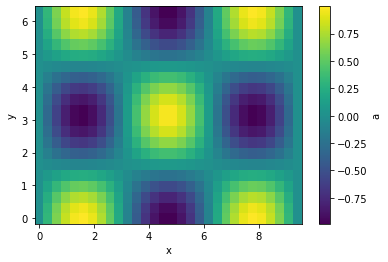

In [5]:
g.plot(cbar=True);

Let's interpolate the values to 200 points along each axis and plot

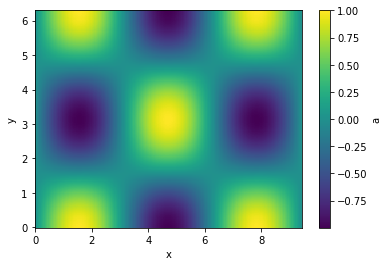

In [6]:
g.interp(x=200, y=200).plot(cbar=True);

The objects are also numpy compatible and indexable by index (integers) or value (floats). Numpy functions with `axis` keywords accept either the name(s) of the axis, e.g. here `x` and therefore is independent of axis ordering, or the usual integer indices.

In [7]:
g[10::-1, :np.pi:2]

y \ x,3.25,2.92,2.6,...,0.65,0.325,0
0,a = -0.108,a = 0.215,a = 0.516,...,a = 0.605,a = 0.319,a = 0
0.661,a = -0.0853,a = 0.17,a = 0.407,...,a = 0.478,a = 0.252,a = 0
1.32,a = -0.0265,a = 0.0528,a = 0.127,...,a = 0.149,a = 0.0784,a = 0
1.98,a = 0.0434,a = -0.0864,a = -0.207,...,a = -0.243,a = -0.128,a = -0
2.65,a = 0.0951,a = -0.189,a = -0.453,...,a = -0.532,a = -0.281,a = -0


In [8]:
np.sum(g[10::-1, :np.pi:2].T, axis='x')

y,0,0.661,1.32,1.98,2.65
a,6.03,4.76,1.48,-2.42,-5.3


### Comparison
As comparison to point out the convenience, an alternative way without using Dragoman to achieve the above would look something like the follwoing for creating and plotting the array:
> ```
> x = np.linspace(0,3*np.pi, 30)
> y = np.linspace(0,2*np.pi, 20) 
>
> xx, yy = np.meshgrid(x, y)
> a = np.sin(xx) * np.cos(yy)
>
> import matplotlib.pyplot as plt
> 
> x_widths = np.diff(x)
> x_pixel_boundaries = np.concatenate([[x[0] - 0.5*x_widths[0]], x[:-1] + 0.5*x_widths, [x[-1] + 0.5*x_widths[-1]]])
> y_widths = np.diff(y)
> y_pixel_boundaries = np.concatenate([[y[0] - 0.5*y_widths[0]], y[:-1] + 0.5*y_widths, [y[-1] + 0.5*y_widths[-1]]])
> 
> pc = plt.pcolormesh(x_pixel_boundaries, y_pixel_boundaries, a)
> plt.gca().set_xlabel('x')
> plt.gca().set_ylabel('y')
> cb = plt.colorbar(pc)
> cb.set_label('a')
```

and for doing the interpolation:

> ```
> from scipy.interpolate import griddata
> 
> interp_x = np.linspace(0,3*np.pi, 200)
> interp_y = np.linspace(0,2*np.pi, 200) 
> 
> grid_x, grid_y = np.meshgrid(interp_x, interp_y)
> 
> points = np.vstack([xx.flatten(), yy.flatten()]).T
> values = a.flatten()
> 
>interp_a = griddata(points, values, (grid_x, grid_y), method='cubic')
```

### PointData

Another representation of data is `PointData`, which is not any different of a dictionary holding same-length nd-arrays or a pandas `DataFrame` (And can actually be instantiated with those)

In [11]:
p = dm.PointData()
p['x'] = np.random.randn(10000)
p['a'] = np.random.rand(p.size) * p['x']**2

In [12]:
p

x,0.894,-0.532,0.179,...,-0.264,-1.78,2.33
a,0.381,0.171,0.0155,...,0.0554,0.711,2.16


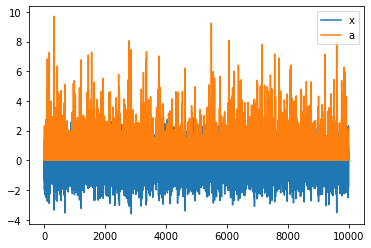

In [13]:
p.plot()
plt.legend();

Maybe a correlation plot would be more insightful:

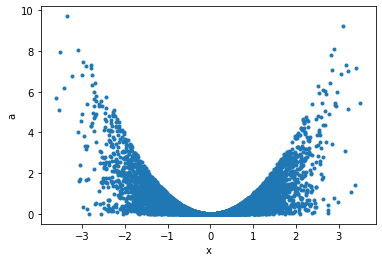

In [14]:
p.plot('x', 'a', '.');

This can now seamlessly be translated into `Griddata`, for example taking the data binwise in `x` in 20 bins, and in each bin summing up points:

In [15]:
p.binwise(x=20).sum()

x,[-3.608 -3.252],[-3.252 -2.896],[-2.896 -2.54 ],...,[2.444 2.8 ],[2.8 3.156],[3.156 3.512]
a,34.7,68,150,...,126,72.3,37.7


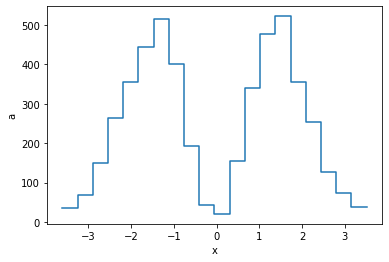

In [16]:
p.binwise(x=20).sum().plot();

This is equivalent of making a weighted histogram, while the latter is faster.

In [17]:
p.histogram(x=20)

x,[-3.608 -3.252],[-3.252 -2.896],[-2.896 -2.54 ],...,[2.444 2.8 ],[2.8 3.156],[3.156 3.512]
a,34.7,68,150,...,126,72.3,37.7
counts,5,16,38,...,39,13,8


In [18]:
np.allclose(p.histogram(x=10)['a'], p.binwise(x=10).sum()['a'])

True

There is also KDE in n-dimensions available, for example:

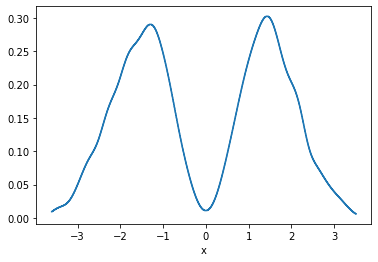

In [19]:
p.kde(x=1000)['a'].plot();

`GridArrays` can also hold multi-dimensional values, like RGB images or here 5 values from the percentile function. Let's plot those as bands:

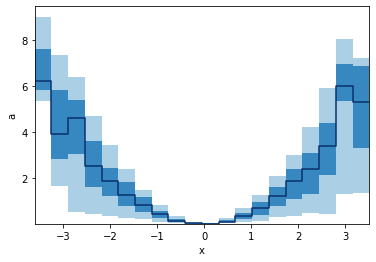

In [20]:
p.binwise(x=20).quantile(q=[0.1, 0.3, 0.5, 0.7, 0.9]).plot_bands()

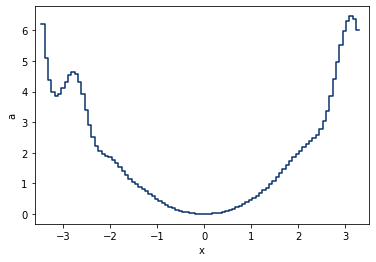

In [26]:
p.binwise(x=20).quantile(q=[0.1, 0.3, 0.5, 0.7, 0.9]).interp(x=100).plot_bands()